## 01_正規分布 

平均を$\mu$、分散を$\sigma^2$とする正規分布の確率密度関数(ガウス関数)は以下の式で表す。またこの分布を$N(\mu, \sigma^2)$で表す。

$$
\begin{align}
f(x)=\frac{1}{\sqrt{2\pi \sigma^2}}\exp{\left\{-\frac{(x-\mu)^2}{2\sigma^2}\right\}}
\end{align}
$$

特に平均$\mu=0$かつ分散$\sigma^2=1$のとき、この分布は**標準正規分布**と呼ばれる。

$$
\begin{align}
f(x)=\frac{1}{\sqrt{2\pi}}\exp\left(-\frac{x^2}{2}\right)
\end{align}
$$

### 正規分布の期待値、分散、標準偏差の導出

#### 期待値

$$
\begin{align}
E(x)=\int_{-\infty}^{\infty}xf(x)dx=\mu
\end{align}
$$

#### 分散

$$
\begin{align}
E(x)=\int_{-\infty}^{\infty}x^2f(x)dx=\sigma^2
\end{align}
$$

#### 標準偏差

$$
\begin{align}
SD(x)=\sqrt{V(x)}=\sigma
\end{align}
$$

### 正規分布の標準化

確率変数$x$が正規分布$N(\mu, \sigma^2)$に従うとき、$Z$を以下の式で変換すると$Z$は標準正規分布$N(0, 1^2)$に従う。

$$
\begin{align}
Z=\frac{x-\mu}{\sigma}
\end{align}
$$

$$
\begin{align}
\Phi(x)=\frac{1}{\sqrt{2\pi}}\exp\left(-\frac{Z^2}{2}\right)
\end{align}
$$

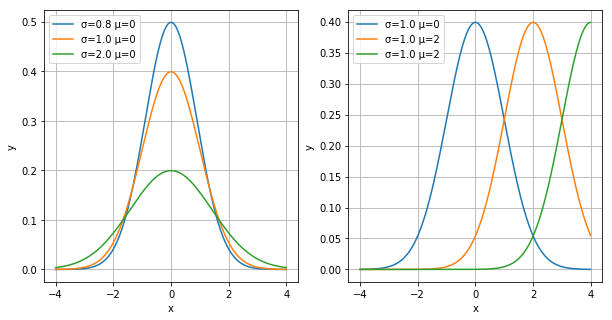

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#画像の出力サイズを調整
plt.figure(figsize=(10,5))

#シグマの値
sigma1 = [0.8,1.0,2.0]
#ミューの値
mu1 = [0,0,0]
#シグマの値
sigma2 = [1.0,1.0,1.0]
#ミューの値
mu2 = [0,2,4]

# -8から8まで0.01刻みの配列
x = np.arange(-4., 4., 0.01)

plt.subplot(1, 2, 1)
for s, m in zip(sigma1,mu1):
    y = (1 / np.sqrt(2 * np.pi * s ** 2) )* np.exp(-(x - m) ** 2 / (2 * s) )
    plt.plot(x, y)
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(["σ=0.8 μ=0", "σ=1.0 μ=0","σ=2.0 μ=0"],loc="upper left")

plt.subplot(1, 2, 2)
for s, m in zip(sigma2,mu2):
    y = (1 / np.sqrt(2 * np.pi * s ** 2) )* np.exp(-(x - m) ** 2 / (2 * s) )
    plt.plot(x, y)
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(["σ=1.0 μ=0", "σ=1.0 μ=2","σ=1.0 μ=2"],loc="upper left")


1σ区間:68.27%
2σ区間:95.45%
3σ区間:99.73%


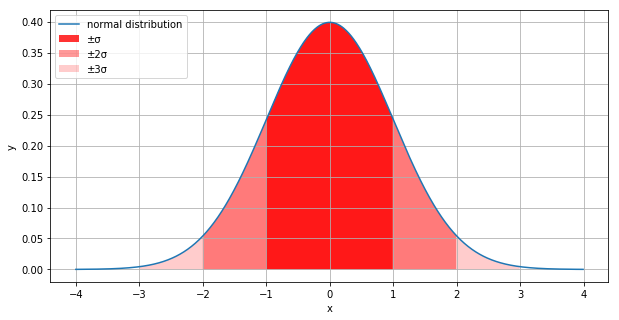

In [51]:
#画像の出力サイズを調整
plt.figure(figsize=(10,5))

# シグマの値
sigma=1
# ミューの値
mu=0

# -8から8まで0.01刻みの配列
x = np.arange(-4., 4., 0.01)
# 標準正規分布の作成
y = (1 / np.sqrt(2 * np.pi * sigma ** 2) )* np.exp(-(x - mu) ** 2 / (2 * sigma) )

# シグマ範囲(-σ<x<σ)
x_sigma1=np.arange(-sigma, sigma, 0.01)
y_sigma1=(1 / np.sqrt(2 * np.pi * sigma ** 2) )* np.exp(-(x_sigma1 - mu) ** 2 / (2 * sigma) )

# シグマ範囲(-2σ<x<2σ)
x_sigma2=np.arange(-2*sigma, 2*sigma, 0.01)
y_sigma2=(1 / np.sqrt(2 * np.pi * sigma ** 2) )* np.exp(-(x_sigma2 - mu) ** 2 / (2 * sigma) )

# シグマ範囲(-3σ<x<3σ)
x_sigma3=np.arange(-3*sigma, 3*sigma, 0.01)
y_sigma3=(1 / np.sqrt(2 * np.pi * sigma ** 2) )* np.exp(-(x_sigma3 - mu) ** 2 / (2 * sigma) )

plt.plot(x, y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.fill_between(x_sigma1, y_sigma1, facecolor='red', alpha=0.8)
plt.fill_between(x_sigma2, y_sigma2, facecolor='red', alpha=0.4)
plt.fill_between(x_sigma3, y_sigma3, facecolor='red', alpha=0.2)
plt.legend(["normal distribution", "±σ", "±2σ","±3σ"],loc="upper left")

from scipy import integrate
f=lambda x: (1 / np.sqrt(2 * np.pi * sigma ** 2) )* np.exp(-(x - mu) ** 2 / (2 * sigma))
print('1σ区間:{:.2f}%'.format(integrate.quad(f, -sigma, sigma)[0]*100))
print('2σ区間:{:.2f}%'.format(integrate.quad(f, -2*sigma, 2*sigma)[0]*100))
print('3σ区間:{:.2f}%'.format(integrate.quad(f, -3*sigma, 3*sigma)[0]*100))
